## Podana funkcja

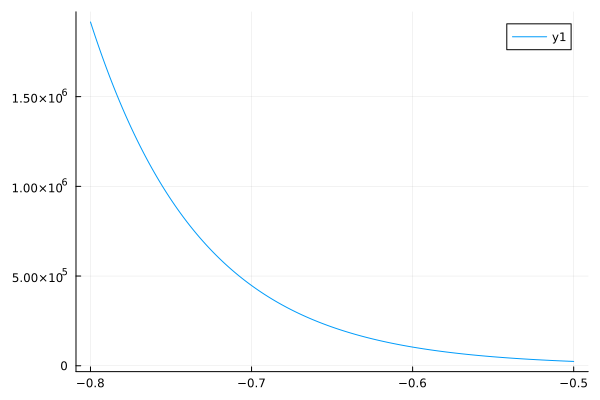

In [153]:
# funkcja b) n=12, m=14, [-0.8, 1.2]
using Plots
using ForwardDiff
using LinearAlgebra
using PrettyTables
using PrettyNumbers

_n = 12
_m = 14
# Root
# x≈0.515749
f = (x) -> (x-1)*exp(-_m*x) + x^_n
f′(x) = ForwardDiff.derivative(f, x)

x = -0.8:0.001:-0.5
# x = 0:.01:0.8
y = f.(x)
y′ = f′.(x)

plot(x,y′)
# plot!([0.515749],[0], label="Root", marker=:dot)
# savefig("my_derative")

## kryteria stopu:

In [154]:
function convergence_based_on_function_value(args)
    return abs(f(args[2])) >= args[3]
end

function convergence_based_on_approximation(args)
    return abs(args[1] - args[2]) >= args[3]
end

convergence_based_on_approximation (generic function with 1 method)

## funkcje iteracyjne

In [155]:

a = -0.8
b = 1.2
ρ = 1e-6

function newton_method(A, B, ρ, stop_con=convergence_based_on_approximation)
    x0 = A
    x1 = x0 - f(x0) / f′(x0)
    iter = 1
    
    while stop_con([x1,x0,ρ])
        x0 = x1
        x1 = x0 - f(x0) / f′(x0)
        iter += 1
    end
    
    return x1, iter
end

function secant_method(A, B, ρ, stop_con=convergence_based_on_approximation)
    x0 = A
    x1 = B
    iter = 0
    
    while stop_con([x1,x0,ρ]) 
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0 = x1
        x1 = x2
        iter += 1
    end
    
    return x1, iter
end

println("Metoda Newtona:")
for i in 1:5
    x, iterations = newton_method(a, b, ρ)
    println("x = $x, iteracje = $iterations")
    a -= 0.1
    b -= 0.1
end

println("Metoda siecznych:")
for i in 1:5
    x, iterations = secant_method(a, b, ρ)
    println("x = $x, iteracje = $iterations")
    a -= 0.1
    b -= 0.1
end

Metoda Newtona:


x = 0.5157485647287522, iteracje = 23
x = 0.5157485647293376, iteracje = 24
x = 0.5157485647287522, iteracje = 26
x = 0.5157485647289896, iteracje = 27
x = 0.5157485647287522, iteracje = 29
Metoda siecznych:
x = 0.6999999998501016, iteracje = 1
x = 0.5999999999946527, iteracje = 1
x = 0.5000000000001285, iteracje = 1
x = 0.4000000000003167, iteracje = 1
x = 0.30000000000035854, iteracje = 1


# badanie metod

## przesunięcie całego przeedziału

In [156]:
Ρ = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]
n = 7
a = -0.8
b = 1.2

function get_results(iter_func, stop_con, A, B)
    res = zeros(n, length(Ρ))
    iter = zeros(Int, n, length(Ρ))
    
    for i in 1:n
        for j in 1:length(Ρ)
            ρ = Ρ[j]
            x, num_iter = iter_func(A, B, ρ, stop_con)
            res[i, j] = x
            iter[i, j] = num_iter
        end
        A -= 0.1
        B -= 0.1
    end
    
    return res, iter
end

get_results (generic function with 1 method)

### warunek stopu zbierzności przybliżeń

#### metoda newtona (stycznych)

In [157]:
results, iterations = get_results(newton_method, convergence_based_on_approximation, a, b)

headers = vcat(["x0","x1"], [pretty_number(String ,ρ) for ρ in Ρ])
left_headaders = zeros(n,2)
tmp_a = a
tmp_b = b
for i in 1:n
    left_headaders[i,1] = tmp_a
    left_headaders[i,2] = tmp_b
    tmp_a -= 0.1
    tmp_b -= 0.1
end
print("newton_method")
pretty_table([left_headaders iterations], header=headers, backend = Val(:html))
pretty_table([left_headaders results], header=headers, backend = Val(:html))

newton_method

x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,23.0,23.0,23.0,24.0,24.0,24.0,24.0,24.0
-0.9,1.1,24.0,25.0,25.0,25.0,25.0,25.0,25.0,26.0
-1.0,1.0,26.0,26.0,26.0,26.0,27.0,27.0,27.0,27.0
-1.1,0.9,27.0,28.0,28.0,28.0,28.0,28.0,28.0,29.0
-1.2,0.8,29.0,29.0,29.0,29.0,29.0,29.0,30.0,30.0
-1.3,0.7,30.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
-1.4,0.6,31.0,31.0,31.0,32.0,32.0,32.0,32.0,32.0


x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-0.9,1.1,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.0,1.0,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.1,0.9,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.2,0.8,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.3,0.7,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.4,0.6,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749


#### metoda siecznych

In [158]:
results, iterations = get_results(secant_method, convergence_based_on_approximation, a, b)

headers = vcat(["x0","x1"], [pretty_number(String ,ρ) for ρ in Ρ])
left_headaders = zeros(n,2)
tmp_a = a
tmp_b = b
for i in 1:n
    left_headaders[i,1] = tmp_a
    left_headaders[i,2] = tmp_b
    tmp_a -= 0.1
    tmp_b -= 0.1
end
print("secant_method")
pretty_table([left_headaders iterations], header=headers, backend = Val(:html))
pretty_table([left_headaders results], header=headers, backend = Val(:html))

secant_method

x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,19.0,20.0,20.0,20.0,20.0,21.0,21.0,21.0
-0.9,1.1,18.0,18.0,18.0,19.0,19.0,19.0,19.0,19.0
-1.0,1.0,1.0,16.0,17.0,17.0,17.0,17.0,18.0,18.0
-1.1,0.9,1.0,1.0,15.0,15.0,16.0,16.0,16.0,16.0
-1.2,0.8,1.0,1.0,1.0,13.0,14.0,14.0,14.0,14.0
-1.3,0.7,1.0,1.0,1.0,1.0,11.0,12.0,12.0,12.0
-1.4,0.6,1.0,1.0,1.0,1.0,1.0,1.0,9.0,9.0


x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-0.9,1.1,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.0,1.0,0.999999,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.1,0.9,0.9,0.9,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.2,0.8,0.8,0.8,0.8,0.515749,0.515749,0.515749,0.515749,0.515749
-1.3,0.7,0.7,0.7,0.7,0.7,0.515749,0.515749,0.515749,0.515749
-1.4,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.515749,0.515749


### warunek stopu zbierzności wartości funkcji

#### metoda newtona (stycznych)

In [159]:
results, iterations = get_results(newton_method, convergence_based_on_function_value, a, b)

headers = vcat(["x0","x1"], [pretty_number(String ,ρ) for ρ in Ρ])
left_headaders = zeros(n,2)
tmp_a = a
tmp_b = b
for i in 1:n
    left_headaders[i,1] = tmp_a
    left_headaders[i,2] = tmp_b
    tmp_a -= 0.1
    tmp_b -= 0.1
end
print("newton_method")
pretty_table([left_headaders iterations], header=headers, backend = Val(:html))
pretty_table([left_headaders results], header=headers, backend = Val(:html))

newton_method

x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,22.0,23.0,23.0,23.0,23.0,24.0,24.0,24.0
-0.9,1.1,24.0,24.0,24.0,25.0,25.0,25.0,25.0,25.0
-1.0,1.0,25.0,26.0,26.0,26.0,26.0,26.0,27.0,27.0
-1.1,0.9,27.0,27.0,27.0,28.0,28.0,28.0,28.0,28.0
-1.2,0.8,28.0,28.0,29.0,29.0,29.0,29.0,29.0,29.0
-1.3,0.7,30.0,30.0,30.0,31.0,31.0,31.0,31.0,31.0
-1.4,0.6,30.0,31.0,31.0,31.0,31.0,32.0,32.0,32.0


x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-0.9,1.1,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.0,1.0,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.1,0.9,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.2,0.8,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.3,0.7,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.4,0.6,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749


#### metoda siecznych

In [160]:
results, iterations = get_results(secant_method, convergence_based_on_function_value, a, b)

headers = vcat(["x0","x1"], [pretty_number(String ,ρ) for ρ in Ρ])
left_headaders = zeros(n,2)
tmp_a = a
tmp_b = b
for i in 1:n
    left_headaders[i,1] = tmp_a
    left_headaders[i,2] = tmp_b
    tmp_a -= 0.1
    tmp_b -= 0.1
end
print("secant_method")
pretty_table([left_headaders iterations], header=headers, backend = Val(:html))
pretty_table([left_headaders results], header=headers, backend = Val(:html))

secant_method

x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,18.0,19.0,19.0,20.0,20.0,20.0,20.0,21.0
-0.9,1.1,17.0,17.0,18.0,18.0,18.0,19.0,19.0,19.0
-1.0,1.0,15.0,16.0,16.0,17.0,17.0,17.0,17.0,18.0
-1.1,0.9,14.0,14.0,14.0,15.0,15.0,15.0,16.0,16.0
-1.2,0.8,12.0,12.0,13.0,13.0,13.0,13.0,14.0,14.0
-1.3,0.7,9.0,10.0,10.0,11.0,11.0,11.0,11.0,12.0
-1.4,0.6,7.0,7.0,8.0,8.0,8.0,9.0,9.0,9.0


x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-0.9,1.1,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.0,1.0,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.1,0.9,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.2,0.8,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.3,0.7,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.4,0.6,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749


## idziemy z lewej strony:

In [161]:
Ρ = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]
n = 7
a = -0.8
b = 1.2

function get_results(iter_func, stop_con, A, B)
    res = zeros(n, length(Ρ))
    iter = zeros(Int, n, length(Ρ))
    
    for i in 1:n
        for j in 1:length(Ρ)
            ρ = Ρ[j]
            x, num_iter = iter_func(A, B, ρ, stop_con)
            res[i, j] = x
            iter[i, j] = num_iter
        end
        A += 0.1
    end
    
    return res, iter
end

get_results (generic function with 1 method)

### warunek stopu zbierzności przybliżeń

#### metoda newtona (stycznych)

In [162]:
results, iterations = get_results(newton_method, convergence_based_on_approximation, a, b)

headers = vcat(["x0","x1"], [pretty_number(String ,ρ) for ρ in Ρ])
left_headaders = zeros(n,2)
tmp_a = a
tmp_b = b
for i in 1:n
    left_headaders[i,1] = tmp_a
    left_headaders[i,2] = tmp_b
    tmp_a -= 0.1
    tmp_b -= 0.1
end
print("newton_method")
pretty_table([left_headaders iterations], header=headers, backend = Val(:html))
pretty_table([left_headaders results], header=headers, backend = Val(:html))

newton_method

x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,23.0,23.0,23.0,24.0,24.0,24.0,24.0,24.0
-0.9,1.1,21.0,22.0,22.0,22.0,22.0,22.0,22.0,23.0
-1.0,1.0,20.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0
-1.1,0.9,18.0,19.0,19.0,19.0,19.0,19.0,19.0,20.0
-1.2,0.8,17.0,17.0,18.0,18.0,18.0,18.0,18.0,18.0
-1.3,0.7,15.0,15.0,15.0,16.0,16.0,16.0,16.0,16.0
-1.4,0.6,14.0,14.0,15.0,15.0,15.0,15.0,15.0,15.0


x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-0.9,1.1,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.0,1.0,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.1,0.9,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.2,0.8,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.3,0.7,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.4,0.6,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749


#### metoda siecznych

In [163]:
results, iterations = get_results(secant_method, convergence_based_on_approximation, a, b)

headers = vcat(["x0","x1"], [pretty_number(String ,ρ) for ρ in Ρ])
left_headaders = zeros(n,2)
tmp_a = a
tmp_b = b
for i in 1:n
    left_headaders[i,1] = tmp_a
    left_headaders[i,2] = tmp_b
    tmp_a -= 0.1
    tmp_b -= 0.1
end
print("secant_method")
pretty_table([left_headaders iterations], header=headers, backend = Val(:html))
pretty_table([left_headaders results], header=headers, backend = Val(:html))

secant_method

x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,19.0,20.0,20.0,20.0,20.0,21.0,21.0,21.0
-0.9,1.1,19.0,20.0,20.0,20.0,20.0,21.0,21.0,21.0
-1.0,1.0,19.0,19.0,20.0,20.0,20.0,20.0,21.0,21.0
-1.1,0.9,19.0,19.0,20.0,20.0,20.0,20.0,21.0,21.0
-1.2,0.8,19.0,19.0,19.0,20.0,20.0,20.0,20.0,21.0
-1.3,0.7,18.0,18.0,18.0,19.0,19.0,19.0,19.0,19.0
-1.4,0.6,13.0,13.0,13.0,14.0,14.0,14.0,14.0,14.0


x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-0.9,1.1,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.0,1.0,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.1,0.9,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.2,0.8,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.3,0.7,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.4,0.6,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749


### warunek stopu zbierzności wartości funkcji

#### metoda newtona (stycznych)

In [164]:
results, iterations = get_results(newton_method, convergence_based_on_function_value, a, b)

headers = vcat(["x0","x1"], [pretty_number(String ,ρ) for ρ in Ρ])
left_headaders = zeros(n,2)
tmp_a = a
tmp_b = b
for i in 1:n
    left_headaders[i,1] = tmp_a
    left_headaders[i,2] = tmp_b
    tmp_a -= 0.1
    tmp_b -= 0.1
end
print("newton_method")
pretty_table([left_headaders iterations], header=headers, backend = Val(:html))
pretty_table([left_headaders results], header=headers, backend = Val(:html))

newton_method

x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,22.0,23.0,23.0,23.0,23.0,24.0,24.0,24.0
-0.9,1.1,21.0,21.0,21.0,22.0,22.0,22.0,22.0,22.0
-1.0,1.0,19.0,20.0,20.0,20.0,21.0,21.0,21.0,21.0
-1.1,0.9,18.0,18.0,18.0,19.0,19.0,19.0,19.0,19.0
-1.2,0.8,17.0,17.0,17.0,17.0,18.0,18.0,18.0,18.0
-1.3,0.7,14.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0
-1.4,0.6,14.0,14.0,14.0,15.0,15.0,15.0,15.0,15.0


x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-0.9,1.1,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.0,1.0,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.1,0.9,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.2,0.8,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.3,0.7,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.4,0.6,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749


#### metoda siecznych

In [165]:
results, iterations = get_results(secant_method, convergence_based_on_function_value, a, b)

headers = vcat(["x0","x1"], [pretty_number(String ,ρ) for ρ in Ρ])
left_headaders = zeros(n,2)
tmp_a = a
tmp_b = b
for i in 1:n
    left_headaders[i,1] = tmp_a
    left_headaders[i,2] = tmp_b
    tmp_a -= 0.1
    tmp_b -= 0.1
end
print("secant_method")
pretty_table([left_headaders iterations], header=headers, backend = Val(:html))
pretty_table([left_headaders results], header=headers, backend = Val(:html))

secant_method

x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,18.0,19.0,19.0,20.0,20.0,20.0,20.0,21.0
-0.9,1.1,18.0,19.0,19.0,20.0,20.0,20.0,20.0,21.0
-1.0,1.0,18.0,19.0,19.0,20.0,20.0,20.0,20.0,21.0
-1.1,0.9,18.0,19.0,19.0,19.0,20.0,20.0,20.0,20.0
-1.2,0.8,18.0,18.0,19.0,19.0,20.0,20.0,20.0,20.0
-1.3,0.7,17.0,17.0,18.0,18.0,18.0,19.0,19.0,19.0
-1.4,0.6,12.0,12.0,13.0,13.0,13.0,14.0,14.0,14.0


x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-0.9,1.1,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.0,1.0,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.1,0.9,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.2,0.8,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.3,0.7,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.4,0.6,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749


## idziemy z prawej strony:

In [166]:
Ρ = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]
n = 7
a = -0.8
b = 1.2

function get_results(iter_func, stop_con, A, B)
    res = zeros(n, length(Ρ))
    iter = zeros(Int, n, length(Ρ))
    
    for i in 1:n
        for j in 1:length(Ρ)
            ρ = Ρ[j]
            x, num_iter = iter_func(A, B, ρ, stop_con)
            res[i, j] = x
            iter[i, j] = num_iter
        end
        B -= 0.1
    end
    
    return res, iter
end

get_results (generic function with 1 method)

### warunek stopu zbierzności przybliżeń

#### metoda newtona (stycznych)

In [167]:
results, iterations = get_results(newton_method, convergence_based_on_approximation, b, b)

headers = vcat(["x0","x1"], [pretty_number(String ,ρ) for ρ in Ρ])
left_headaders = zeros(n,2)
tmp_a = a
tmp_b = b
for i in 1:n
    left_headaders[i,1] = tmp_a
    left_headaders[i,2] = tmp_b
    tmp_a -= 0.1
    tmp_b -= 0.1
end
print("newton_method")
pretty_table([left_headaders iterations], header=headers, backend = Val(:html))
pretty_table([left_headaders results], header=headers, backend = Val(:html))

newton_method

x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,13.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
-0.9,1.1,13.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
-1.0,1.0,13.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
-1.1,0.9,13.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
-1.2,0.8,13.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
-1.3,0.7,13.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
-1.4,0.6,13.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0


x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-0.9,1.1,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.0,1.0,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.1,0.9,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.2,0.8,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.3,0.7,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.4,0.6,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749


#### metoda siecznych

In [168]:
results, iterations = get_results(secant_method, convergence_based_on_approximation, a, b)

headers = vcat(["x0","x1"], [pretty_number(String ,ρ) for ρ in Ρ])
left_headaders = zeros(n,2)
tmp_a = a
tmp_b = b
for i in 1:n
    left_headaders[i,1] = tmp_a
    left_headaders[i,2] = tmp_b
    tmp_a -= 0.1
    tmp_b -= 0.1
end
print("secant_method")
pretty_table([left_headaders iterations], header=headers, backend = Val(:html))
pretty_table([left_headaders results], header=headers, backend = Val(:html))

secant_method

x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,19.0,20.0,20.0,20.0,20.0,21.0,21.0,21.0
-0.9,1.1,18.0,18.0,18.0,19.0,19.0,19.0,19.0,19.0
-1.0,1.0,16.0,16.0,17.0,17.0,17.0,17.0,18.0,18.0
-1.1,0.9,14.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0
-1.2,0.8,1.0,13.0,13.0,13.0,14.0,14.0,14.0,14.0
-1.3,0.7,1.0,11.0,11.0,11.0,11.0,12.0,12.0,12.0
-1.4,0.6,1.0,1.0,8.0,9.0,9.0,9.0,9.0,9.0


x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-0.9,1.1,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.0,1.0,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.1,0.9,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.2,0.8,0.799999,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.3,0.7,0.7,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.4,0.6,0.6,0.6,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749


### warunek stopu zbierzności wartości funkcji

#### metoda newtona (stycznych)

In [169]:
results, iterations = get_results(newton_method, convergence_based_on_function_value, b, b)

headers = vcat(["x0","x1"], [pretty_number(String ,ρ) for ρ in Ρ])
left_headaders = zeros(n,2)
tmp_a = a
tmp_b = b
for i in 1:n
    left_headaders[i,1] = tmp_a
    left_headaders[i,2] = tmp_b
    tmp_a -= 0.1
    tmp_b -= 0.1
end
print("newton_method")
pretty_table([left_headaders iterations], header=headers, backend = Val(:html))
pretty_table([left_headaders results], header=headers, backend = Val(:html))

newton_method

x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,13.0,13.0,13.0,14.0,14.0,14.0,14.0,14.0
-0.9,1.1,13.0,13.0,13.0,14.0,14.0,14.0,14.0,14.0
-1.0,1.0,13.0,13.0,13.0,14.0,14.0,14.0,14.0,14.0
-1.1,0.9,13.0,13.0,13.0,14.0,14.0,14.0,14.0,14.0
-1.2,0.8,13.0,13.0,13.0,14.0,14.0,14.0,14.0,14.0
-1.3,0.7,13.0,13.0,13.0,14.0,14.0,14.0,14.0,14.0
-1.4,0.6,13.0,13.0,13.0,14.0,14.0,14.0,14.0,14.0


x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-0.9,1.1,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.0,1.0,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.1,0.9,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.2,0.8,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.3,0.7,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.4,0.6,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749


#### metoda siecznych

In [170]:
results, iterations = get_results(secant_method, convergence_based_on_function_value, a, b)

headers = vcat(["x0","x1"], [pretty_number(String ,ρ) for ρ in Ρ])
left_headaders = zeros(n,2)
tmp_a = a
tmp_b = b
for i in 1:n
    left_headaders[i,1] = tmp_a
    left_headaders[i,2] = tmp_b
    tmp_a -= 0.1
    tmp_b -= 0.1
end
print("secant_method")
pretty_table([left_headaders iterations], header=headers, backend = Val(:html))
pretty_table([left_headaders results], header=headers, backend = Val(:html))

secant_method

x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,18.0,19.0,19.0,20.0,20.0,20.0,20.0,21.0
-0.9,1.1,17.0,17.0,18.0,18.0,18.0,19.0,19.0,19.0
-1.0,1.0,15.0,16.0,16.0,17.0,17.0,17.0,17.0,18.0
-1.1,0.9,14.0,14.0,14.0,15.0,15.0,15.0,16.0,16.0
-1.2,0.8,12.0,12.0,13.0,13.0,13.0,13.0,14.0,14.0
-1.3,0.7,9.0,10.0,10.0,11.0,11.0,11.0,11.0,12.0
-1.4,0.6,7.0,7.0,8.0,8.0,8.0,9.0,9.0,9.0


x0,x1,1 × 10⁻⁶,1 × 10⁻⁷,1 × 10⁻⁸,1 × 10⁻⁹,1 × 10⁻¹⁰,1 × 10⁻¹¹,1 × 10⁻¹²,1 × 10⁻¹³
-0.8,1.2,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-0.9,1.1,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.0,1.0,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.1,0.9,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.2,0.8,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.3,0.7,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
-1.4,0.6,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749,0.515749
